# Data exploration

## Objectives
 - Explore the heart.csv dataset and analyze if there is any correlation between the variables

## Inputs
- inputs/datasets/collection/heart.csv

## Outputs
- Have an overview of the feature and check which correlates the most

---

## Setting working Directory
The steps below allow to set heart_attack risk as the new working directory

- get current directory and print it


In [5]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heart_attack_risk/jupyer_notebooks'

- set new working directory as parent of the previous current directory
- As a result heart_attack_risk is the new working directory  

In [6]:
os.chdir(os.path.dirname(current_dir))


## Load dataset

In [7]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/heart.csv"))
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## List of variables
**age** : The age of the indvidual

**sex** : The biological sex of the individual

**cp** : Chest Pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

**trtbps** : Resting blood pressure (in mm Hg)

**chol** : Cholestoral in mg/dl fetched via BMI sensor

**fbs** : Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** : Resting electrocardiographic results

- Value 0: normal

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach** : Maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)

**oldpeak**: Oldpeak refers to the ST segment depression observed on an electrocardiogram (ECG) during exercise.

**slp**: The slope of the ST segment indicates how the ST segment behaves during exercise.
It is categorized into three levels:

- value 0: A negative slope (downward) indicates that the ST segment is depressed during exercise. This is abnormal and associated with myocardial ischemia (reduced blood flow to the heart muscle).

- value 1: A flat or horizontal slope suggests that the ST segment remains relatively unchanged during exercise.
    
- value 2: A positive slope indicates that the ST segment is rising during exercise. This is considered normal.

**caa**: The number of major coronary arteries that are affected by atherosclerosis or blockages.

**thall**: Maximum heart rate achieved


**output** : 0= less chance of heart attack 1= more chance of heart attack

## Data exploration

Analyzing variables distribution, missing data and relevance in business context

In [8]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation study

- Spearman coefficient assesses the monotonic relationship between variables

In [10]:
corr_spearman = df.corr(method='spearman')['output'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

cp          0.460860
caa        -0.457607
exng       -0.436757
thalachh    0.428370
oldpeak    -0.421487
thall      -0.403299
slp         0.371460
sex        -0.280937
age        -0.238400
restecg     0.148612
Name: output, dtype: float64

- Chest pain type(cp), Number of major vessels(caa), exercise induced angina(exng), maximum heart rate achieved (thalachh) and oldpeak are the variables which correlates the most according to the spearman coefficient

- Pearson coefficient assesses the linear relationship between two variables

In [11]:
corr_pearson = df.corr(method='pearson')['output'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

exng       -0.436757
cp          0.433798
oldpeak    -0.430696
thalachh    0.421741
caa        -0.391724
slp         0.345877
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
Name: output, dtype: float64

- Exercise induced angina(exng), Chest pain type(cp), oldpeak, maximum heart rate achieved (thalachh), Number of major vessels(caa),  are variable which correlates the most according to the Pearson coefficient

- Although in a different order, both Spearman and Pearson methods describe the same five variables as the ones that correlate the most.

- Defining the variable which correlates the most

In [12]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'caa', 'cp', 'exng', 'oldpeak', 'thalachh'}

- Set the variables to study

In [13]:
vars_to_study = ['caa', 'cp', 'exng', 'oldpeak', 'thalachh']
vars_to_study

['caa', 'cp', 'exng', 'oldpeak', 'thalachh']

## Exploratory Data Analysis (EDA)

- Build a dataframe including only the most important variables


In [14]:
df_eda = df.filter(vars_to_study + ['output'])
df_eda.head(3)

,caa,cp,exng,oldpeak,thalachh,output
0,0,3,0,2.3,150,1
1,0,2,0,3.5,187,1
2,0,1,0,1.4,172,1


### Variables Distribution by Heart Attack risk

- plot the distribution (numerical and categorical) coloured by heart attack risk

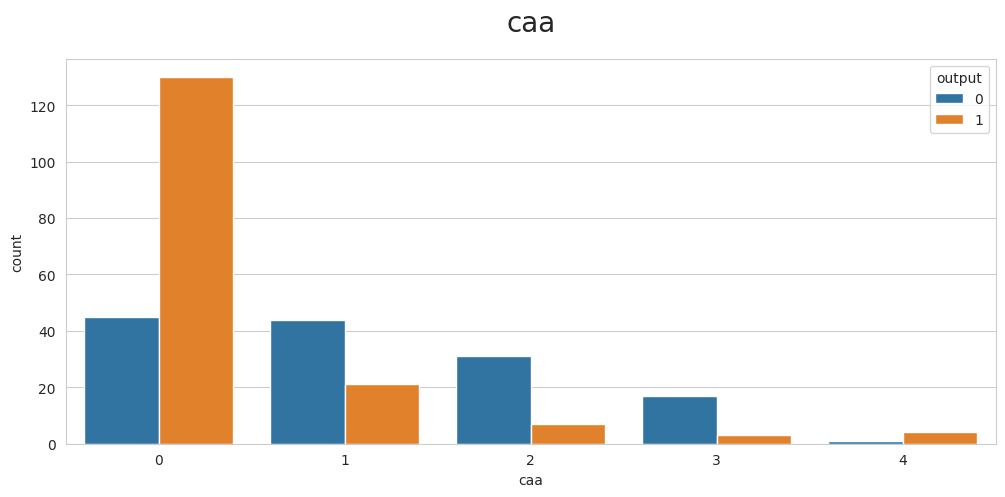

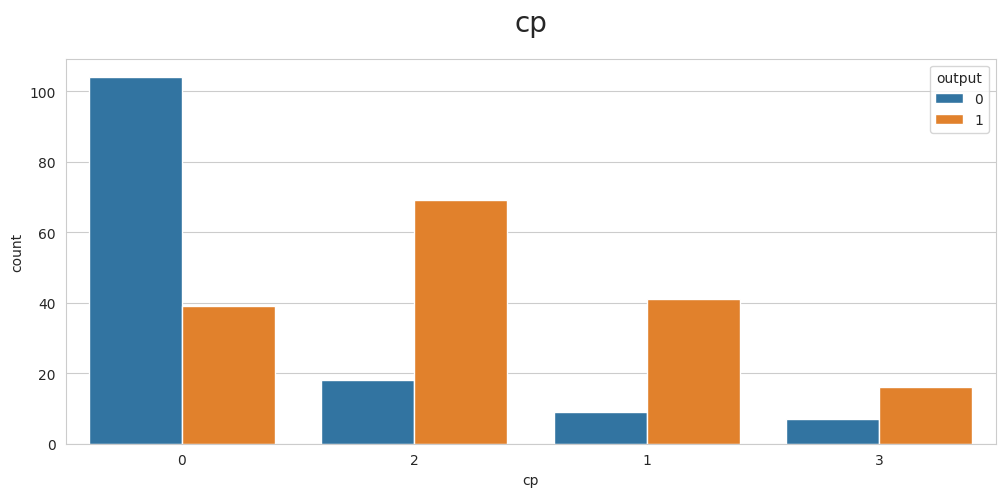

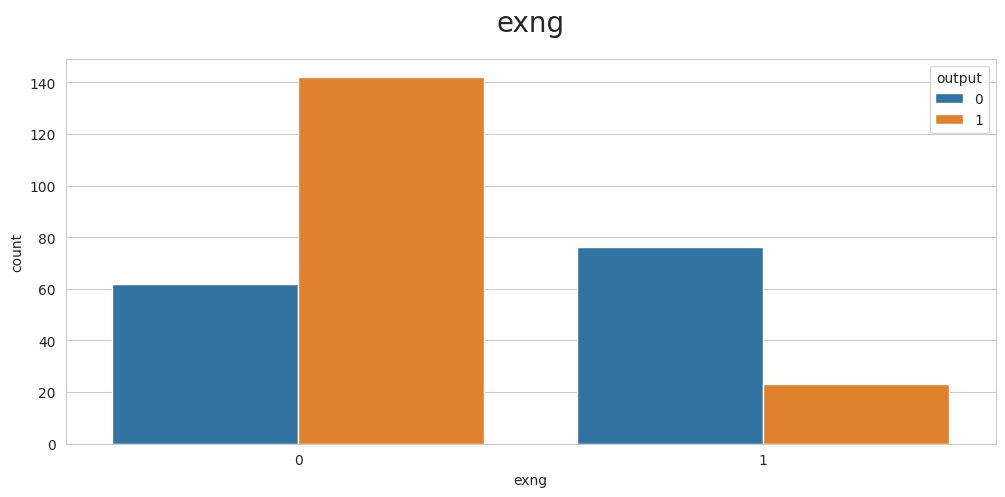

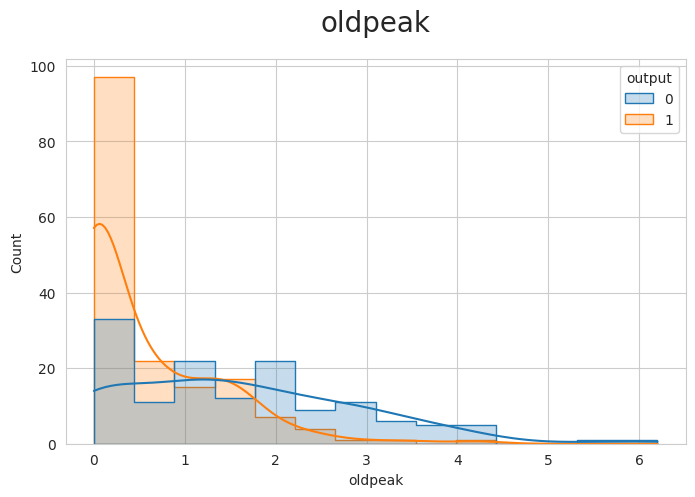

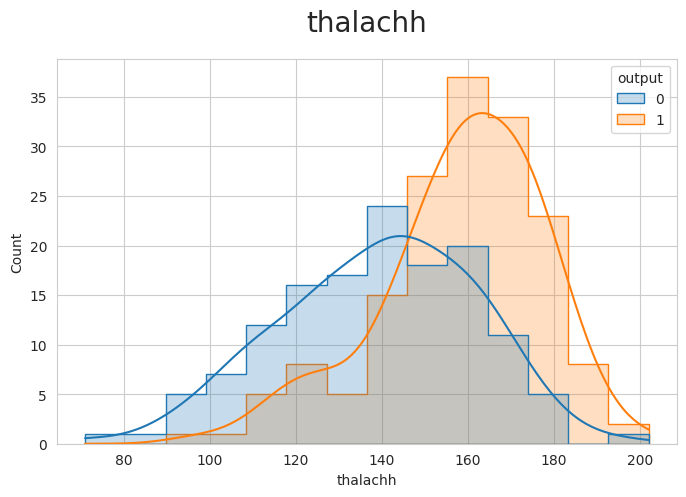

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks()
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

def plot_based_on_unique_values(df, col, target_var):
    if df[col].nunique() < 6:
        plot_categorical(df, col, target_var)
    else:
        plot_numerical(df, col, target_var)


target_var = 'output'
for col in vars_to_study:
    plot_based_on_unique_values(df_eda, col, target_var)